<a href="https://colab.research.google.com/github/Avishi2511/parameter-optimization/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
           'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df = pd.read_csv(url, header=None, names=columns)

In [ ]:
df

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])

X = df.drop('letter', axis=1).values
y = df['letter'].values

In [ ]:
X

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]], dtype=int64)

In [ ]:
y

array([19,  8,  3, ..., 19, 18,  0])

In [ ]:
results = []
convergence_data = {}

In [ ]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=i)

    best_score = 0
    best_params = {}
    scores = []

    for C in np.linspace(0.1, 10, 100):  # 100 iterations with different C values
        print(i," in loop")
        svm = SVC(C=C, kernel='rbf', gamma='scale')
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        scores.append(acc)
        if acc > best_score:
            best_score = acc
            best_params = {'C': C, 'kernel': 'rbf', 'gamma': 'scale'}

    results.append({
        'Sample': i + 1,
        'Best Accuracy': best_score,
        'Best Parameters': best_params
    })
    convergence_data[i] = scores

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n=== Best Parameters and Accuracies (Table 1) ===\n")
print(results_df)

0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop

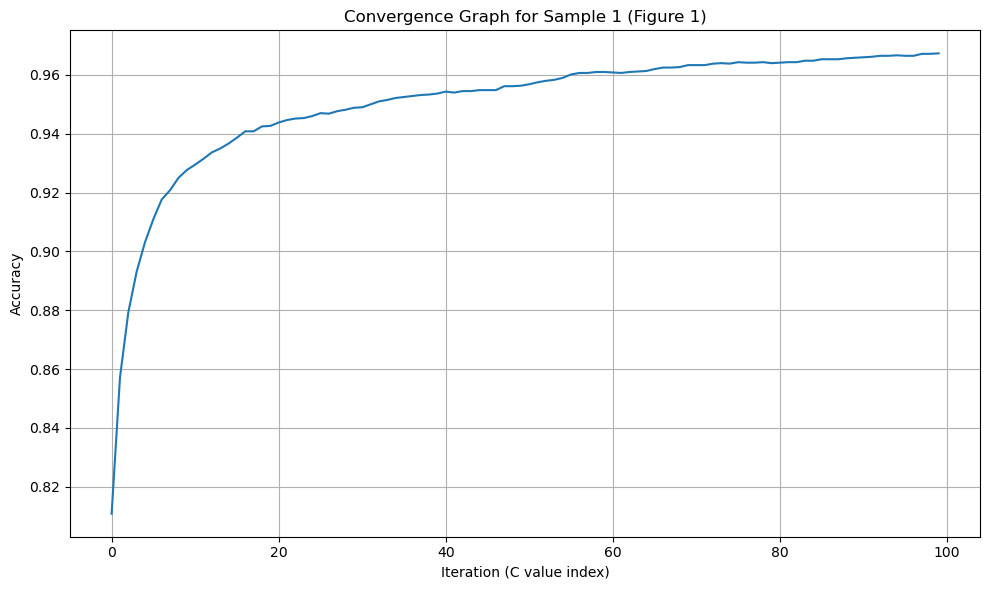

In [ ]:
best_sample_idx = results_df['Best Accuracy'].idxmax()
plt.figure(figsize=(10, 6))
plt.plot(convergence_data[best_sample_idx])
plt.title(f'Convergence Graph for Sample {best_sample_idx + 1} (Figure 1)')
plt.xlabel('Iteration (C value index)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()